<a href="https://colab.research.google.com/github/valdolab/DS-ML_Projects/blob/main/6-ComputerVision/Note_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to computer vision
With CNNs

## Computer vision

For computer a image is a matrix

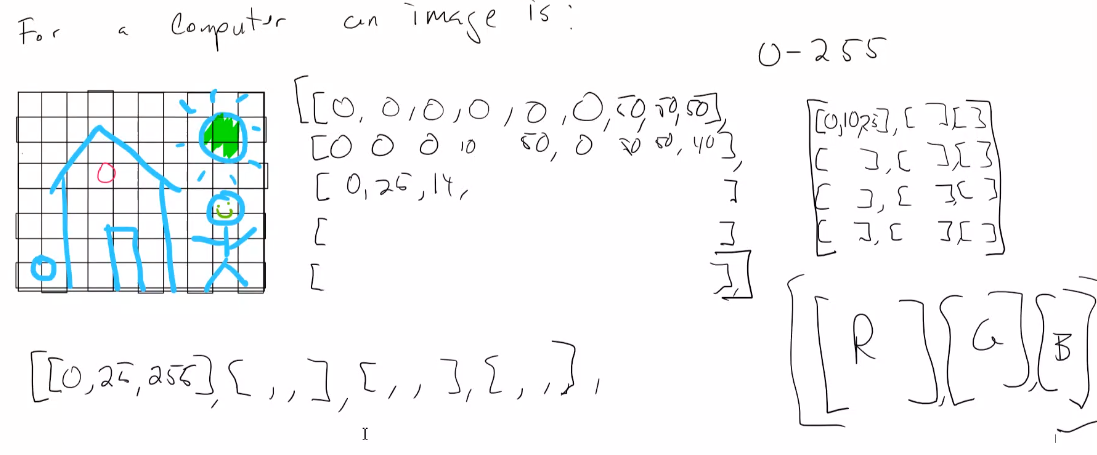

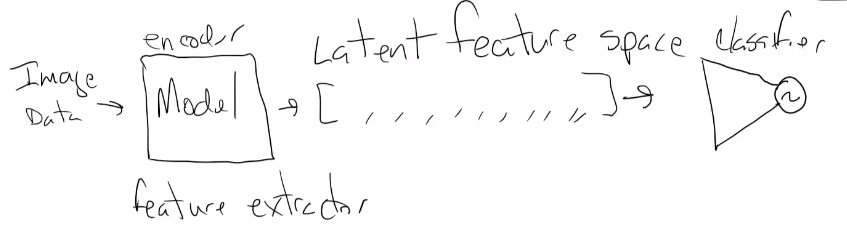

This is a ilustration of CNNs, basicaly the convolution layers are a kind of encoders, like NLP. \
Cuando se hace transfer learning, solo se transfiere el conocimiento de estas layers de convolucion, porque son las capaz que funcionan como "encoders", extrayendo las caracteristicas de la imagen para el clasificador (normal, clasico). Entonces, en transfer learning tu tienes que proponer la red clasificador y transferir el conocimiento del encoder o convolucion.

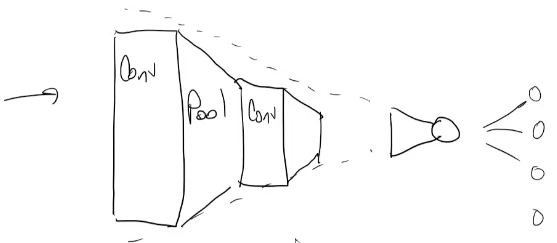

Image segmentation, find objects in the image

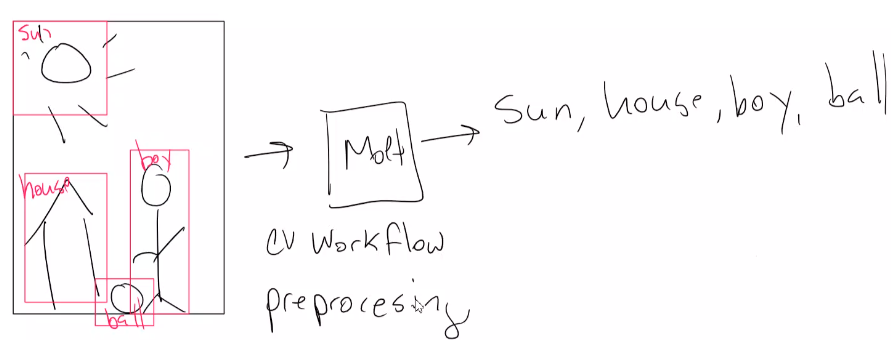

In videos, object track

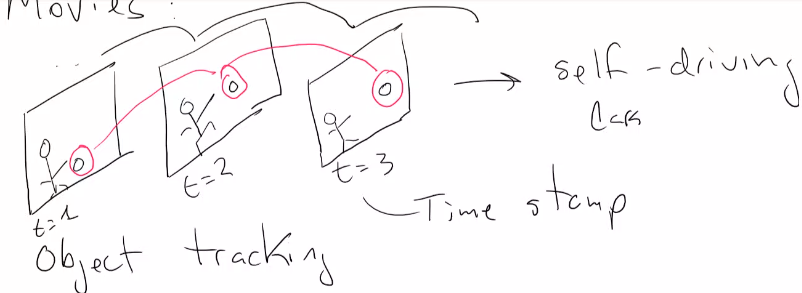

## Time series

Assumption of regression:

*   Linear
*   Homoskedasticity
*   No auto-correlation

Assumption of time series:

*   Not linear
*   Heteroskadastic
*   Self correlated-autoregressive






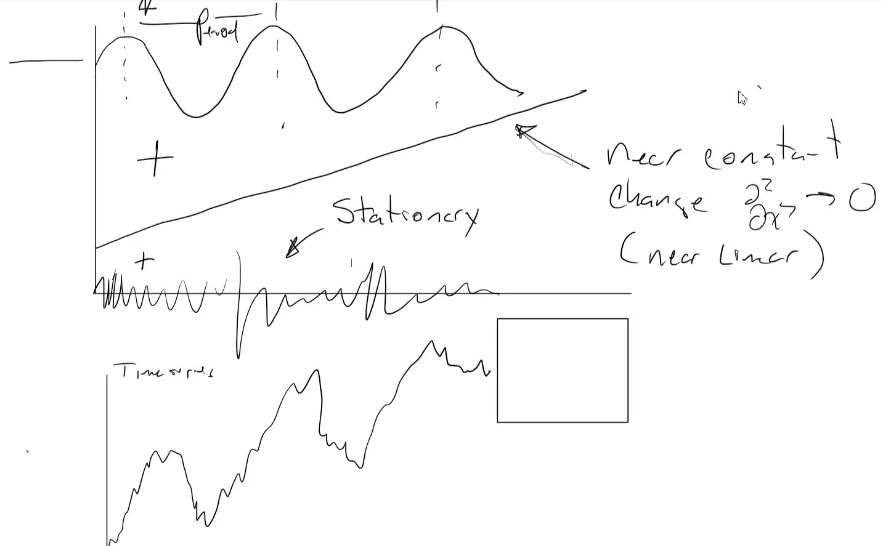

**Decomposition:** \
Method to extract the trend, seasoncilty and residual components of a time-series. \

**Residuals:** stationarity  (No seasonal components)

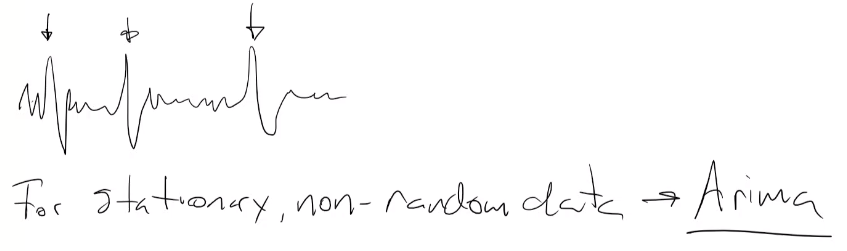

**Alternatives to ARIMA:**

*   SARIMA: seasonal Arima
*   SARIMAX: Multiple output arima with seasonlity
*   VARUNAM, VARIMAX, MULTIVARIATE, SINGLE AND MULTIPLE OUT


**Neural Net alternatives**

*   RNNs, LSTMS sequence predictors
*   Transforms?

**Faceboood prophet**

*   List item
*   List item









## Codes, implementation of Computer vision

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
I = plt.imread('/content/drive/MyDrive/Colab Notebooks/EIT_W6/dog.jpg')
#I = plt.imread('/content/drive/MyDrive/Colab Notebooks/EIT_W6/dogs.png')

In [ ]:
I.shape

(225, 300, 3)

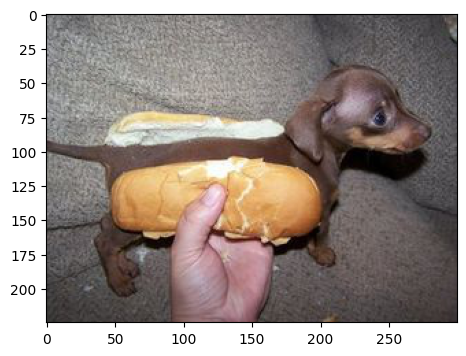

In [ ]:
plt.figure(figsize=(6,4))
plt.imshow(I)

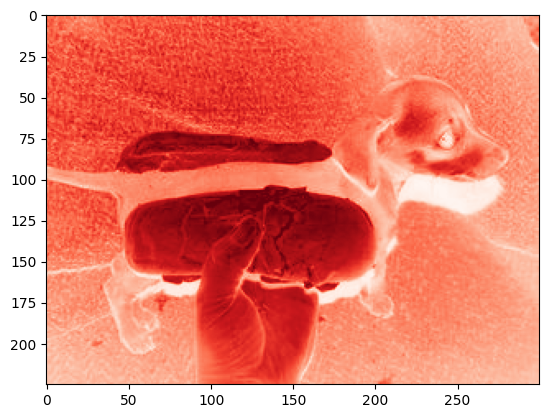

In [ ]:
plt.imshow(I[:,:,0],cmap="Reds")

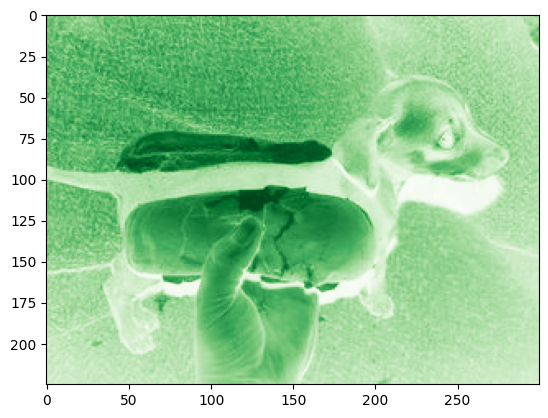

In [ ]:
plt.imshow(I[:,:,1],cmap="Greens")

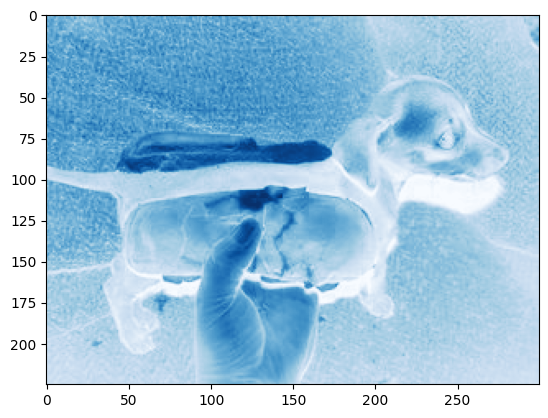

In [ ]:
plt.imshow(I[:,:,2],cmap="Blues")

In [ ]:
BW = np.mean(I, axis=2)
BW.shape

(225, 300)

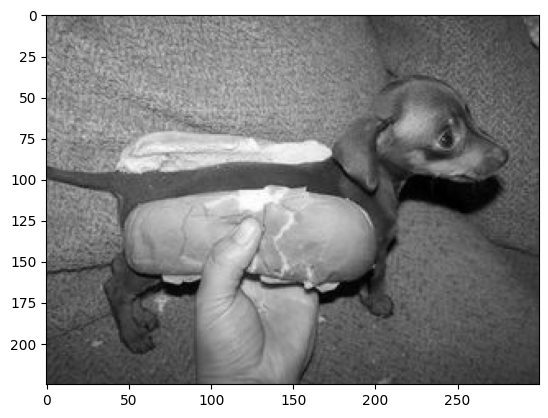

In [ ]:
plt.imshow(BW, cmap="gray")

In [ ]:
import PIL
from PIL import Image

In [ ]:
Ip = Image.open('/content/drive/MyDrive/Colab Notebooks/EIT_W6/dog.jpg')

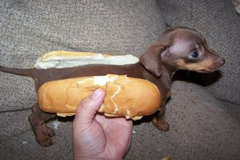

In [ ]:
Irez = Ip.resize((240,160))
Irez

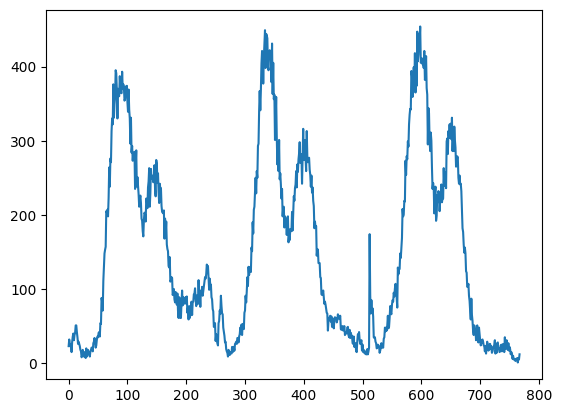

In [ ]:
plt.plot(Irez.histogram())

In [ ]:
I_contrast = (I*0.3)/255

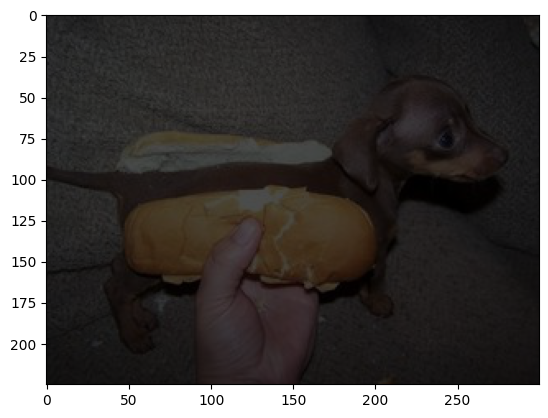

In [ ]:
plt.imshow(I_contrast)

In [ ]:
paddedImage = np.pad(BW,[[20,20],[20,20]],'edge')

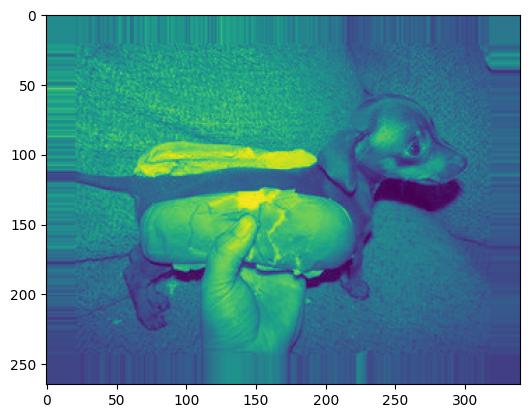

In [ ]:
plt.imshow(paddedImage)

### Convolution

Animation of how works the convolution, basicaly is a filter that exact the features of the image, how? \
- Comparando el kernel con la imagen, si el kernel (matrix) se parece a ese pedazo de imagen, podra un valor alto ahi, como correlacion de bloques de la imagen, los kernel pueden ser generados aletoriamente, y asi encontrar patrones en la imagen.

commons.wikimedia.org/wiki/File:2D_Convolution_Animation.gif#/media/File:2D_Convolution_Animation.gif

In [ ]:
flter2D = np.array([[0,0,0],[0,1,0],[0,0,0]])
flterXX=np.array([[0,1,0],[0,1,0],[0,1,0]])
flterNeg=np.array([[-10,1,-1],[-1,1,-1],[-1,1,-1]])
flterREdge=np.array([[-10,0,10],[-10,0,10],[-10,0,10]])

flterLEdge=np.array([[10,0,-10],[10,0,-10],[10,0,-10]])

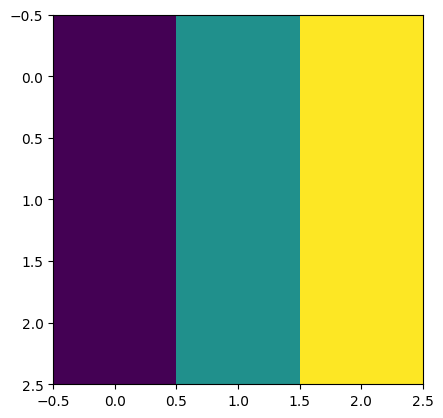

In [ ]:
plt.imshow(flterREdge)

In [ ]:
def discrete2DConv(Image,flter,padding):

  paddedImage = np.pad(Image,padding,'constant')
  flter = np.rot90(flter,2)
  conv = np.empty(Image.shape)

  for i in range(paddedImage.shape[0]-flter.shape[0]):
    for j in range(paddedImage.shape[1]-flter.shape[1]):

      conv[i,j] = np.sum((paddedImage[i:i+flter.shape[0],j:j+flter.shape[1]])*flter)

  return conv

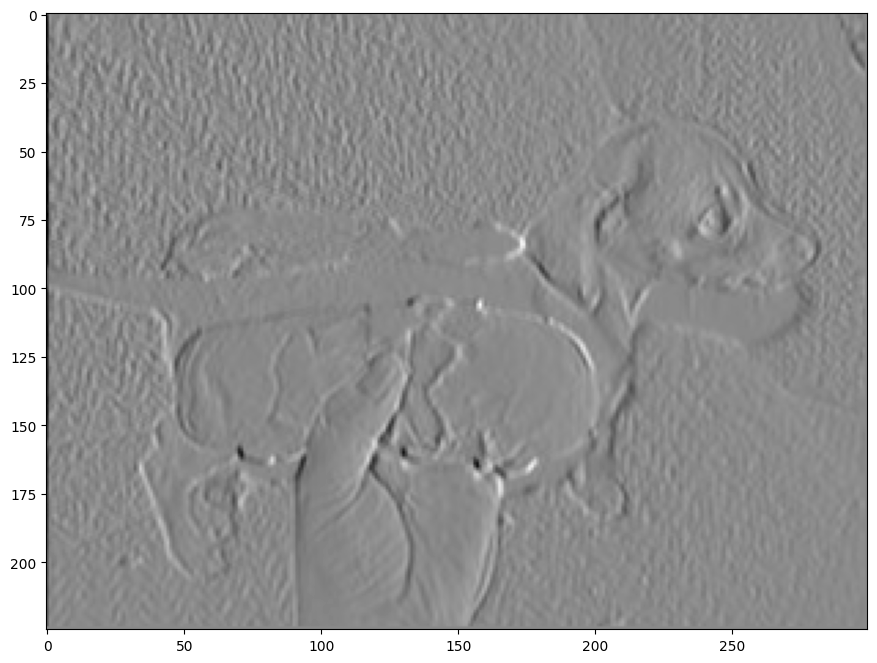

In [ ]:
ImConv = discrete2DConv(BW,flterREdge,1)
plt.figure(figsize=(16,8))
plt.imshow(ImConv, cmap='gray')

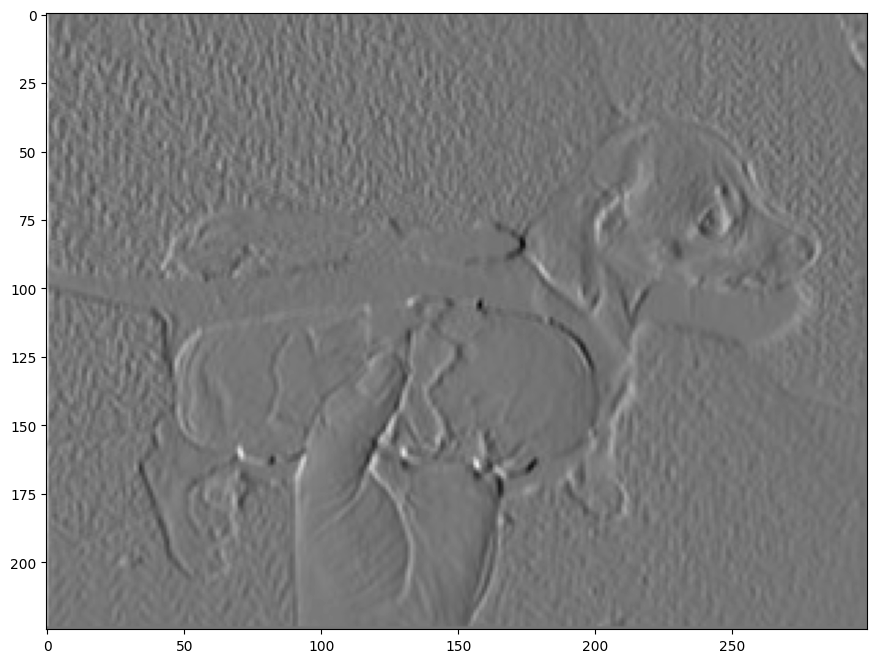

In [ ]:
ImConv = discrete2DConv(BW,flterLEdge,1)
plt.figure(figsize=(16,8))
plt.imshow(ImConv, cmap='gray')

In [ ]:
def MaxPool(Image,ksize,stride):
  n = 0
  k = 0

  vert = int(Image.shape[1]/stride)
  hoz = int(Image.shape[0]/stride)
  MxPool = np.empty((hoz,vert))

  for i in range(0,Image.shape[0]-stride,stride):
    n = 0
    for j in range(0, Image.shape[1]-stride,stride):
      MxPool[k,n] = np.max(Image[i:i+ksize, j:j+ksize])
      n += 1
    k += 1

  return MxPool

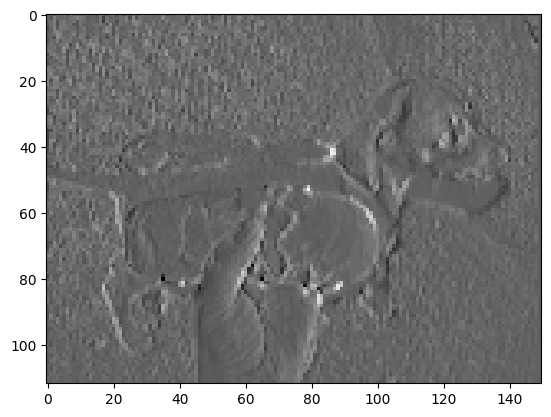

In [ ]:
ImPool = MaxPool(ImConv,2,2)
plt.imshow(ImPool, cmap='gray')

**model architecture:** \

In [ ]:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #
=================================================================
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0

 conv2d (Conv2D)             (None, 148, 148, 16)      448

 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0
 )

 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640

 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0
 2D)

 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496

 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0
 2D)

 flatten (Flatten)           (None, 18496)             0

 dense (Dense)               (None, 512)               9470464

 dense_1 (Dense)             (None, 1)                 513

=================================================================
Total params: 9,494,561
Trainable params: 9,494,561
Non-trainable params: 0

### cats and dogs image classification using CNN

In [ ]:
#download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

--2023-04-10 14:31:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   137MB/s    in 0.5s    

2023-04-10 14:31:48 (137 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import zipfile

In [ ]:
import matplotlib.image as mpimg

In [ ]:
os.getcwd()

'/content'

In [ ]:
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [ ]:
#labels for training
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
#labels for test
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
validation_dogs_dir

'/content/cats_and_dogs_filtered/validation/dogs'

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

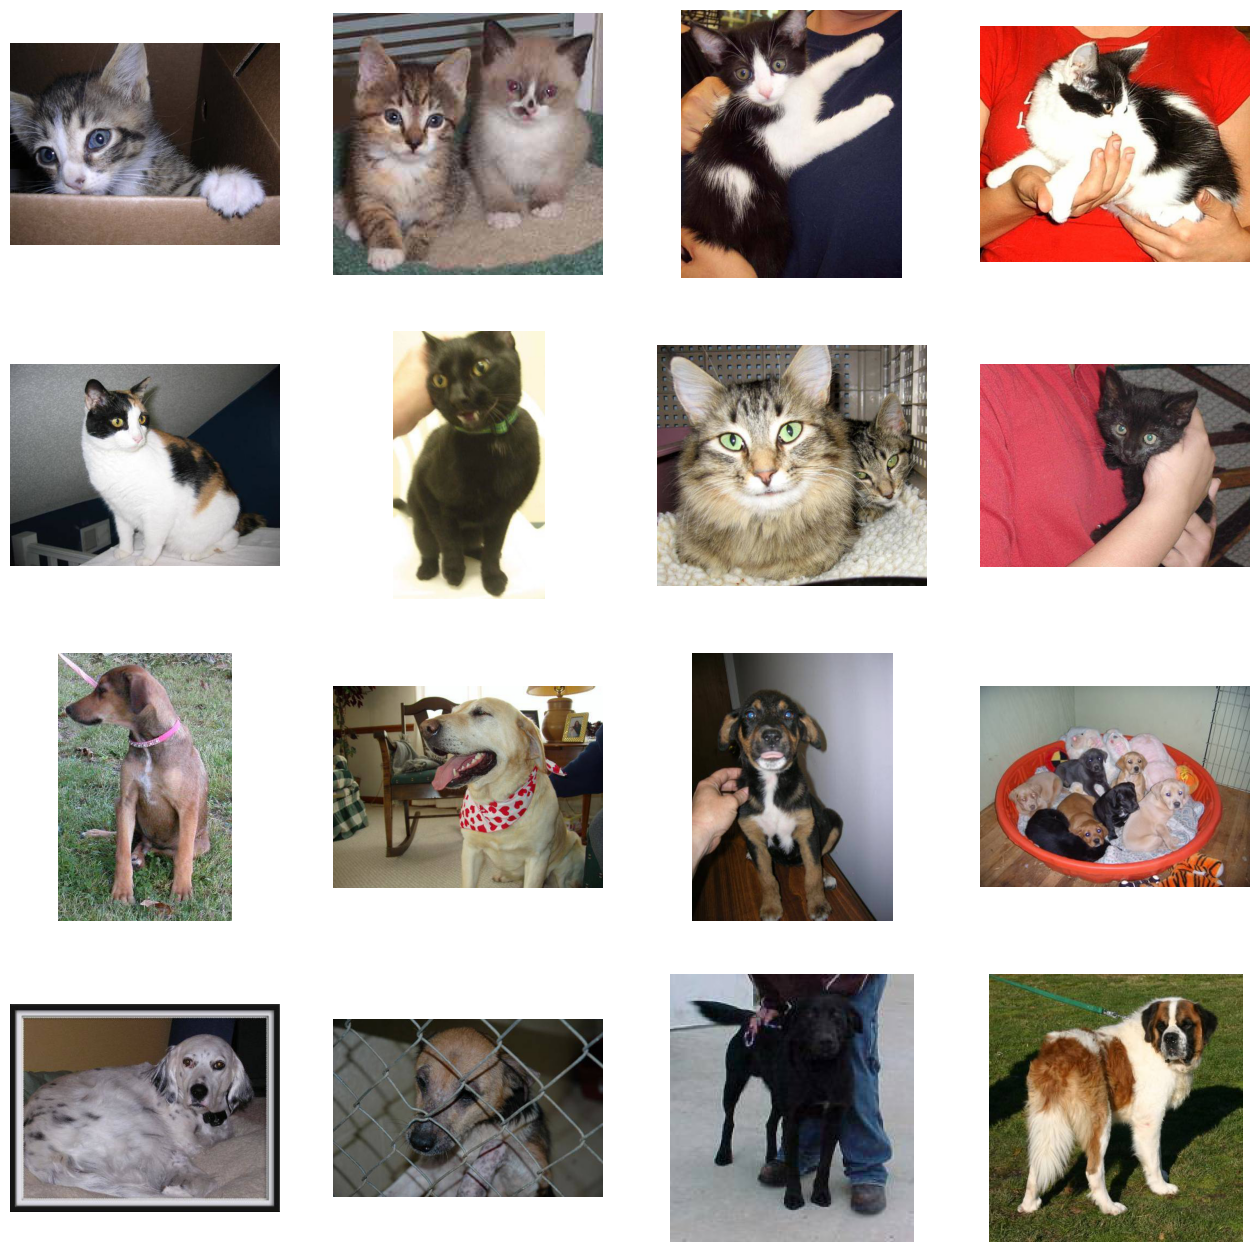

In [ ]:
nrow = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4,nrow*4)

pic_index = 8
next_cat = [os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog = [os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i,img_path in enumerate(next_cat+next_dog):
  sp = plt.subplot(nrow,ncols,i+1)
  sp = plt.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

In [ ]:
# build the model
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
img_input = keras.layers.Input(shape=(150,150,3))

L = keras.layers.Conv2D(16,3, activation='relu')(img_input)
L = keras.layers.MaxPool2D(2)(L)

L = keras.layers.Conv2D(32,3, activation = 'relu')(L)
L = keras.layers.MaxPool2D(2)(L)

L = keras.layers.Conv2D(64,3, activation = 'relu')(L)
L = keras.layers.MaxPool2D(2)(L)

F = keras.layers.Flatten()(L)
F = keras.layers.Dense(512, activation = 'relu')(F)

output = keras.layers.Dense(1, activation = 'sigmoid')(F)

In [ ]:
model = keras.Model(img_input,output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss='binary_crossentropy',optimizer= RMSprop(learning_rate=0.001), metrics=['acc'])

#### Image data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 50, verbose = 2)

Epoch 1/15
100/100 - 85s - loss: 0.7225 - acc: 0.5505 - val_loss: 0.6713 - val_acc: 0.6530 - 85s/epoch - 848ms/step
Epoch 2/15
100/100 - 79s - loss: 0.6704 - acc: 0.6110 - val_loss: 0.6242 - val_acc: 0.6380 - 79s/epoch - 786ms/step
Epoch 3/15
100/100 - 76s - loss: 0.5922 - acc: 0.6850 - val_loss: 0.5771 - val_acc: 0.7160 - 76s/epoch - 760ms/step
Epoch 4/15
100/100 - 76s - loss: 0.5295 - acc: 0.7335 - val_loss: 0.5928 - val_acc: 0.6830 - 76s/epoch - 764ms/step
Epoch 5/15
100/100 - 77s - loss: 0.4823 - acc: 0.7705 - val_loss: 0.5594 - val_acc: 0.7190 - 77s/epoch - 767ms/step
Epoch 6/15
100/100 - 78s - loss: 0.4239 - acc: 0.8050 - val_loss: 0.5477 - val_acc: 0.7310 - 78s/epoch - 780ms/step
Epoch 7/15
100/100 - 76s - loss: 0.3493 - acc: 0.8450 - val_loss: 0.6794 - val_acc: 0.6930 - 76s/epoch - 757ms/step
Epoch 8/15
100/100 - 76s - loss: 0.2884 - acc: 0.8725 - val_loss: 0.6306 - val_acc: 0.7240 - 76s/epoch - 759ms/step
Epoch 9/15
100/100 - 78s - loss: 0.2129 - acc: 0.9115 - val_loss: 0.7283

### Image augmentation

A cat is still a cat if panned, pan-ivariance, rotation, zoom, etc.

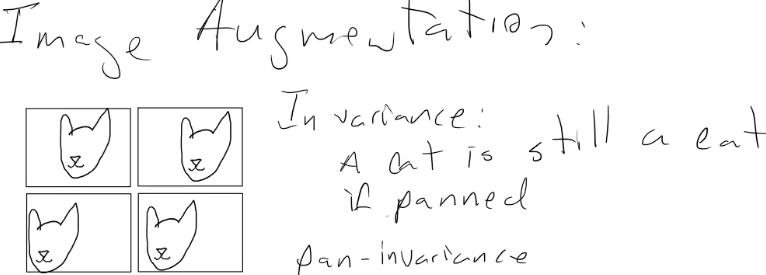

## Code for Time Series Analysis using ARIMA
implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
DF = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EIT_W6/Electric_Production.csv")
DF = DF.rename(columns={'DATE': 'ds','IPG2211A2N': 'ts'})
DF

ds        ts
0     1/1/1985   72.5052
1     2/1/1985   70.6720
2     3/1/1985   62.4502
3     4/1/1985   57.4714
4     5/1/1985   55.3151
..         ...       ...
392   9/1/2017   98.6154
393  10/1/2017   93.6137
394  11/1/2017   97.3359
395  12/1/2017  114.7212
396   1/1/2018  129.4048

[397 rows x 2 columns]

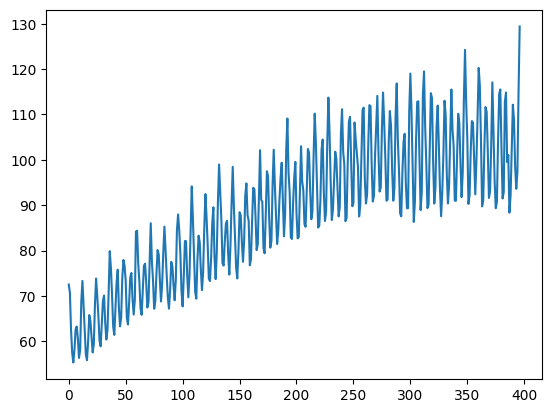

In [ ]:
plt.figure()
plt.plot(DF.ts)

In [ ]:
def log_trans(df,ts): return df[ts].apply(lambda x:np.log(x))

In [ ]:
DF['ts_log'] = log_trans(DF,'ts')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition = seasonal_decompose(DF['ts_log'], period = 48, extrapolate_trend=1)

In [ ]:
def plot_decomposition(df, ts, trend,seasonal, residual):
  f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,5), sharex=True )

  ax1.plot(df[ts], label="Original")
  ax1.legend(loc='best')
  ax1.tick_params(axis ='x', rotation=45)

  ax2.plot(df[trend], label="Trend")
  ax2.legend(loc='best')
  ax2.tick_params(axis ='x', rotation=45)

  ax3.plot(df[seasonal], label="Seasonal")
  ax3.legend(loc='best')
  ax3.tick_params(axis ='x', rotation=45)

  ax4.plot(df[residual], label="Residuals")
  ax4.legend(loc='best')
  ax4.tick_params(axis ='x', rotation=45)

  plt.tight_layout()
  plt.show()

In [ ]:
New_DF = DF

In [ ]:
New_DF.loc[:,'trend'] = decomposition.trend
New_DF.loc[:,'seasonal'] = decomposition.seasonal
New_DF.loc[:,'residuals'] = decomposition.resid

In [ ]:
New_DF

ds        ts    ts_log     trend  seasonal  residuals
0     1/1/1985   72.5052  4.283658  4.133735  0.138884   0.011040
1     2/1/1985   70.6720  4.258049  4.135335  0.058420   0.064295
2     3/1/1985   62.4502  4.134369  4.136935  0.005165  -0.007731
3     4/1/1985   57.4714  4.051287  4.138535 -0.108258   0.021010
4     5/1/1985   55.3151  4.013046  4.140136 -0.120782  -0.006308
..         ...       ...       ...       ...       ...        ...
392   9/1/2017   98.6154  4.591227  4.631649 -0.036022  -0.004399
393  10/1/2017   93.6137  4.539177  4.631768 -0.104301   0.011710
394  11/1/2017   97.3359  4.578168  4.631888 -0.071174   0.017454
395  12/1/2017  114.7212  4.742505  4.632007  0.087002   0.023496
396   1/1/2018  129.4048  4.862945  4.632126  0.147799   0.083020

[397 rows x 6 columns]

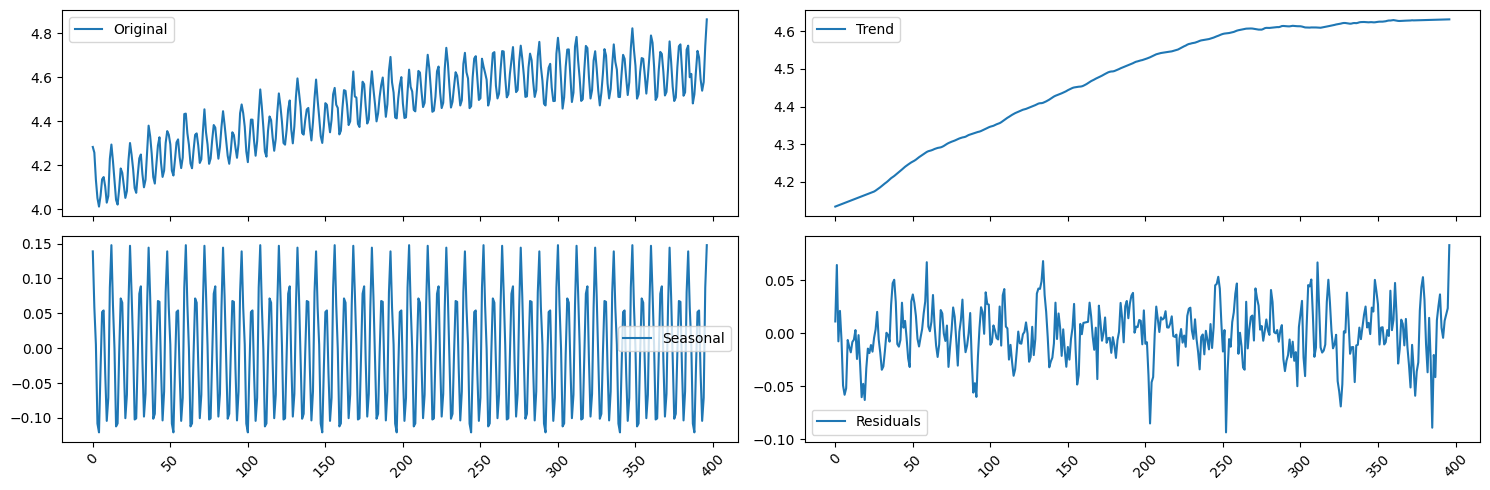

In [ ]:
plot_decomposition(New_DF,ts='ts_log',trend='trend',seasonal='seasonal',residual='residuals')

Test for Stationarity Dickey-Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
dftest = adfuller(New_DF['residuals'], autolag = 'AIC')

In [ ]:
def test_stationarity(df, ts):

  rolmean = df[ts].rolling(window=12, center= False).mean()
  rolstd =  df[ts].rolling(window=12, center = False).std()

  orig = plt.plot(df[ts], color = 'blue', label ="Original")
  mean = plt.plot(rolmean, color ='red', label ="Rolling Mean")
  std = plt.plot(rolstd, color='black', label ="Rolling Std")
  plt.legend(loc = 'best')
  plt.title("Rolling Mean and Standard Deviation for  %s" %(ts))
  plt.xticks(rotation =45)
  plt.show(block = False)
  plt.close

  print('Results:')
  dftest = adfuller(df[ts], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=["Test Statistic",'p=value','# Lasgs Used',' Number of Observations'])

  for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)' %key]= value

  print(dfoutput)

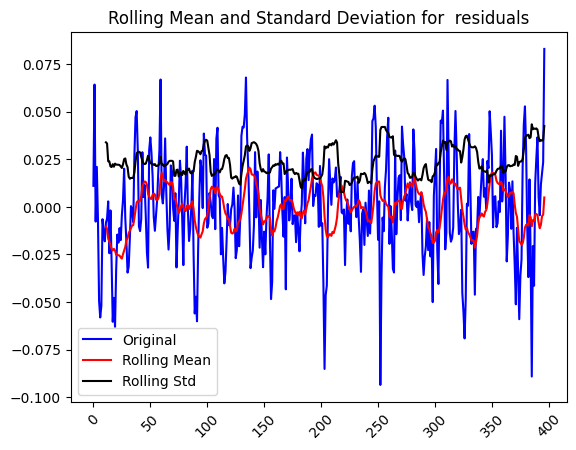

Results:
Test Statistic              -5.309599
p=value                      0.000005
# Lasgs Used                15.000000
 Number of Observations    381.000000
Critical Value(1%)          -3.447631
Critical Value(5%)          -2.869156
Critical Value(10%)         -2.570827
dtype: float64


In [ ]:
test_stationarity(df=New_DF, ts='residuals')

Autocorrelation Plots, ACF and PACF partial

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


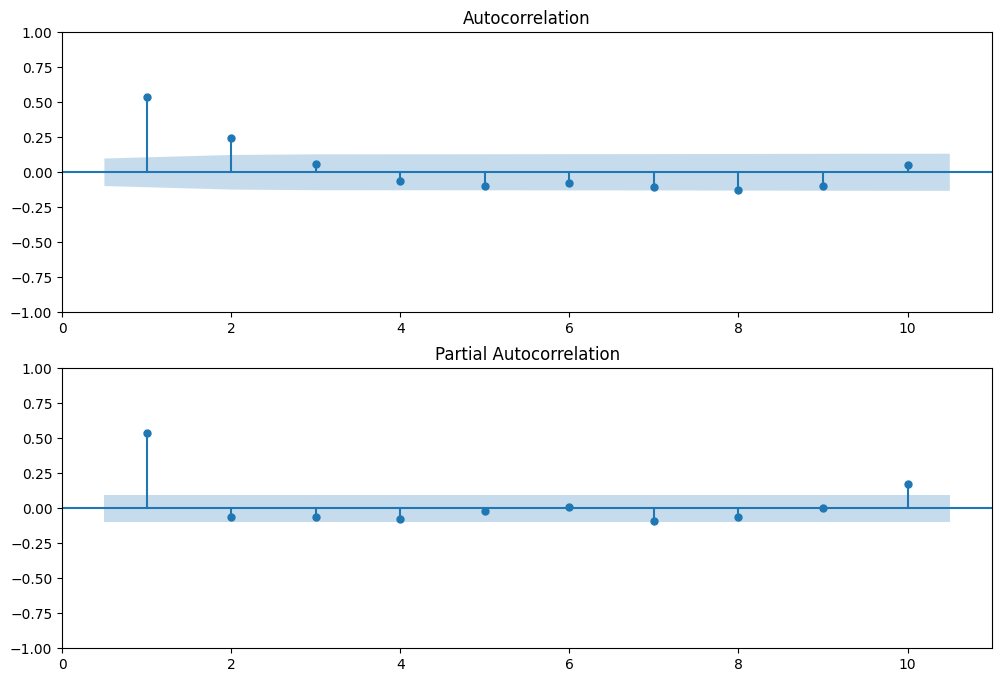

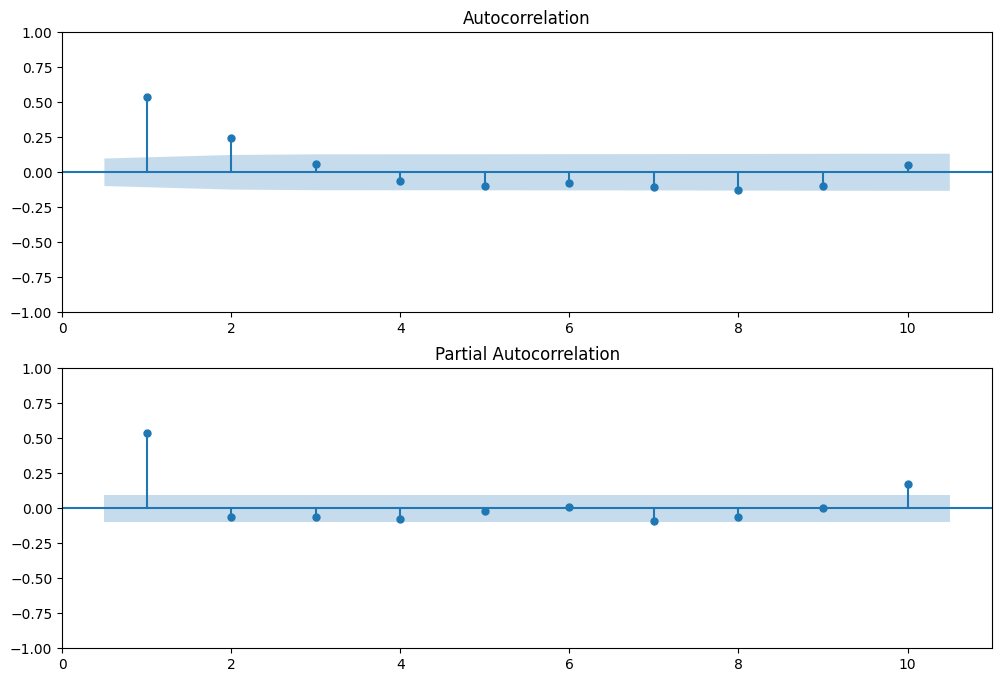

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF of df
plot_acf(New_DF['residuals'], lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(New_DF['residuals'], lags=10, zero=False, ax=ax2)

### Forecasting using Autocorrelated Integrated Moving Average (ARIMA)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
def run_Arima(df,ts,p,d,q):
  model = ARIMA(df[ts], order=(p,d,q))
  results_arima = model.fit()

  len_results = len(results_arima.fittedvalues)
  ts_modified = df[ts][-len_results:]

  rss = sum((results_arima.fittedvalues-ts_modified)**2)
  rmse = np.sqrt(rss/len(df[ts]))
  print('RMSE: ', rmse)

  plt.figure()
  plt.plot(df[ts])
  plt.plot(results_arima.fittedvalues, color = 'red')
  plt.show()

  return results_arima

In [ ]:
New_DF = New_DF.fillna(value=0)

In [ ]:
model_AR = run_Arima(df=New_DF, ts='residuals', p=15, d=0,q=0)

In [ ]:
my_forecast = model_AR.forecast(23)

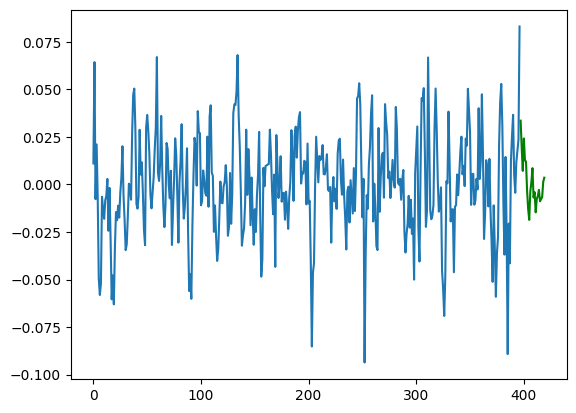

In [ ]:
plt.figure()
plt.plot(New_DF['residuals'])
plt.plot(my_forecast, color='green')

### Time Series Analysis using FB Prophet

In [ ]:
!pip install pystan==2.19.1.1 --quiet
!pip install fbprophet --quiet
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 50.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
from fbprophet import Prophet
import datetime

In [ ]:
pro_df = New_DF.filter(['ds','ts']).copy()

In [ ]:
pro_df = pro_df.rename(columns={'ds':'ds','ts':'y'})

In [ ]:
pro_df['ds'] = pd.to_datetime(pro_df['ds'], dayfirst=False)

In [ ]:
pro_df

ds         y
0   1985-01-01   72.5052
1   1985-02-01   70.6720
2   1985-03-01   62.4502
3   1985-04-01   57.4714
4   1985-05-01   55.3151
..         ...       ...
392 2017-09-01   98.6154
393 2017-10-01   93.6137
394 2017-11-01   97.3359
395 2017-12-01  114.7212
396 2018-01-01  129.4048

[397 rows x 2 columns]

In [ ]:
model = Prophet(changepoint_prior_scale=0.01)
model.fit(pro_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
future_dat = model.make_future_dataframe(periods=365)

In [ ]:
forcasts = model.predict(future_dat)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


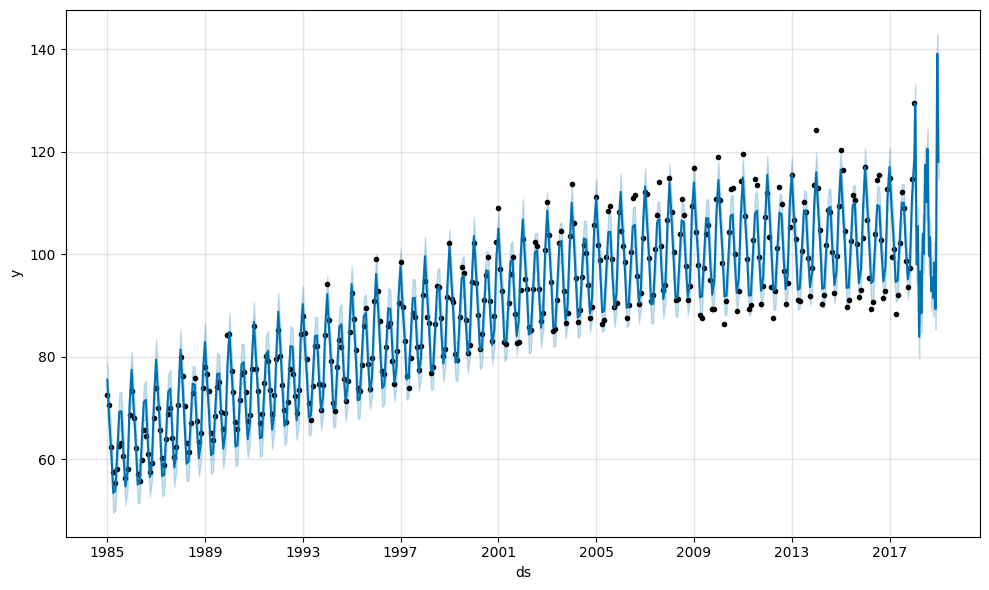

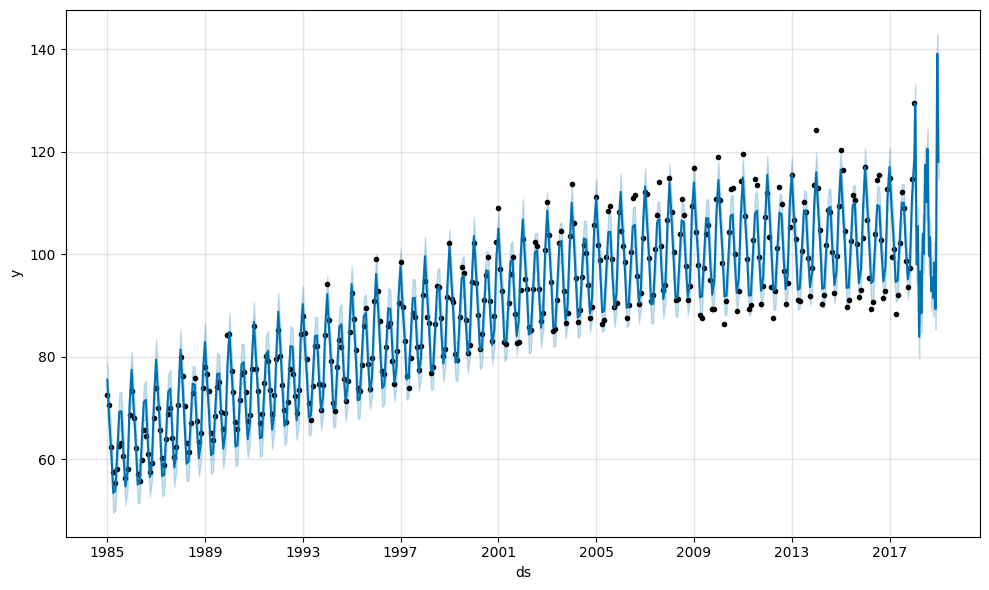

In [ ]:
model.plot(forcasts)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


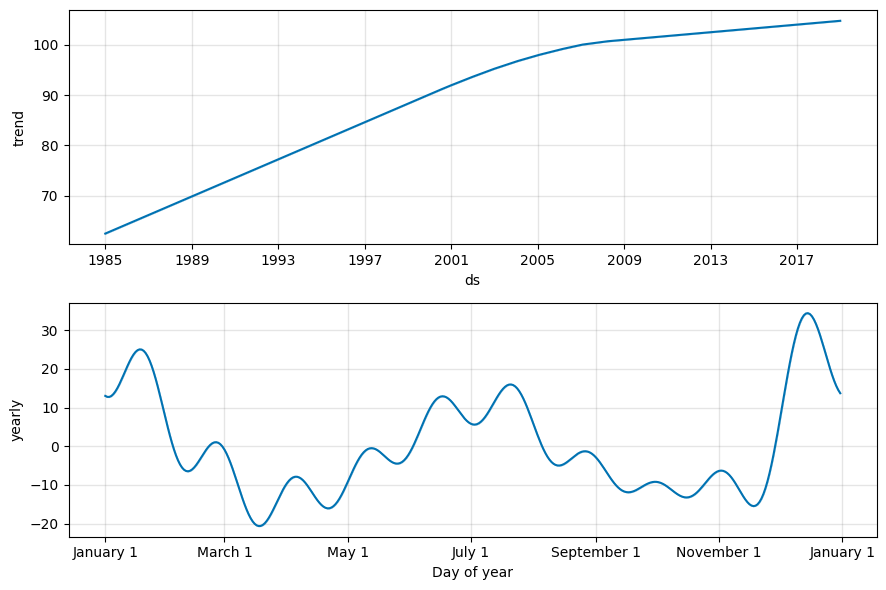

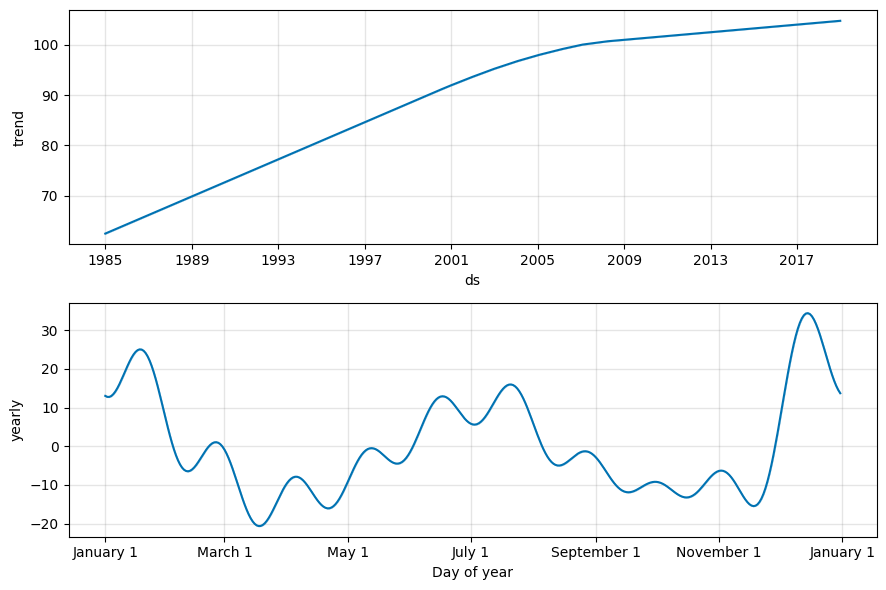

In [ ]:
model.plot_components(forcasts)

## Image Augmentation and Transfer Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 20
IMG_SHAPE = 150

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes =axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(
    batch_size = BATCH_SIZE,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_SHAPE,IMG_SHAPE),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

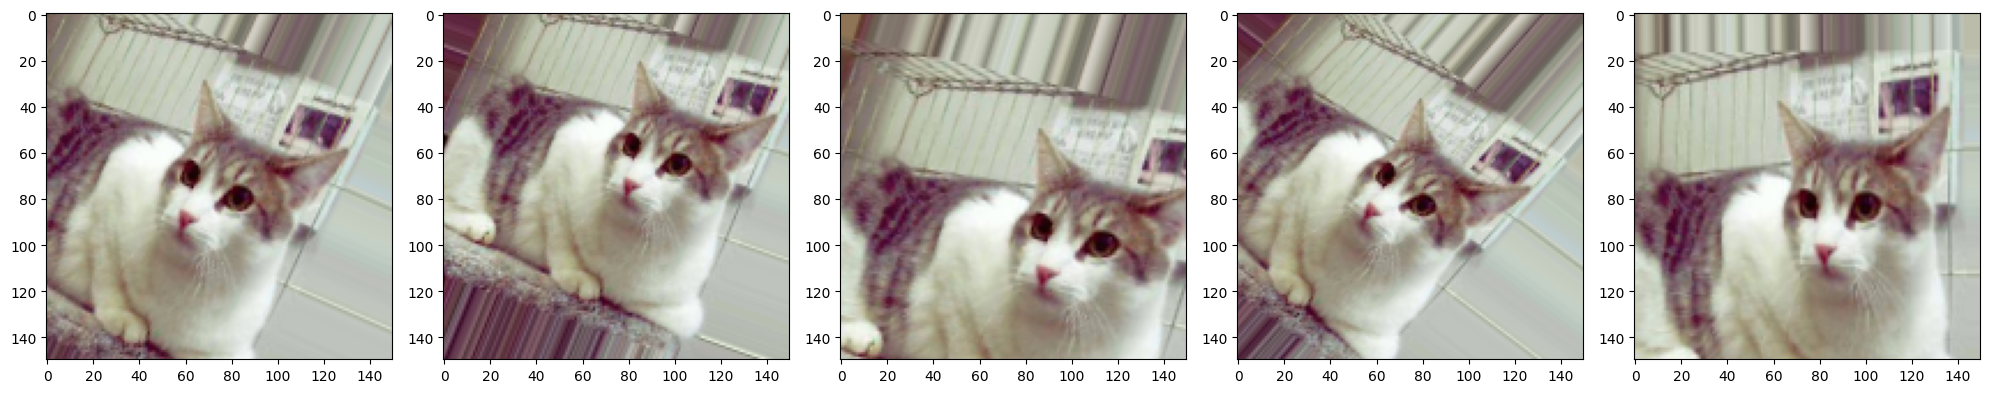

In [ ]:
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    directory = validation_dir,
    target_size = (IMG_SHAPE,IMG_SHAPE),
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


### Transfer learning using VGG16

In [ ]:
from keras.applications import vgg16
import tensorflow as tf
import keras

In [ ]:
INPUT_SHAPE = (150,150,3)

In [ ]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=INPUT_SHAPE)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

In [ ]:
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras import Model

In [ ]:
output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model_trainable = False
for layer in vgg_model.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 8192)              14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(learning_rate=0.005),
    metrics=['accuracy']
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=4)

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = 10,
    epochs = 30,
    validation_data = val_data_gen,
    validation_steps = 10,
    callbacks = [callback],
    verbose = 2
)

Epoch 1/30
10/10 - 60s - loss: 0.6304 - accuracy: 0.6450 - 60s/epoch - 6s/step
Epoch 2/30
10/10 - 57s - loss: 0.8930 - accuracy: 0.6000 - 57s/epoch - 6s/step
Epoch 3/30
10/10 - 55s - loss: 0.7682 - accuracy: 0.6000 - 55s/epoch - 5s/step
Epoch 4/30
10/10 - 57s - loss: 0.6304 - accuracy: 0.6450 - 57s/epoch - 6s/step
Epoch 5/30
10/10 - 56s - loss: 0.8209 - accuracy: 0.5900 - 56s/epoch - 6s/step


## Object detection

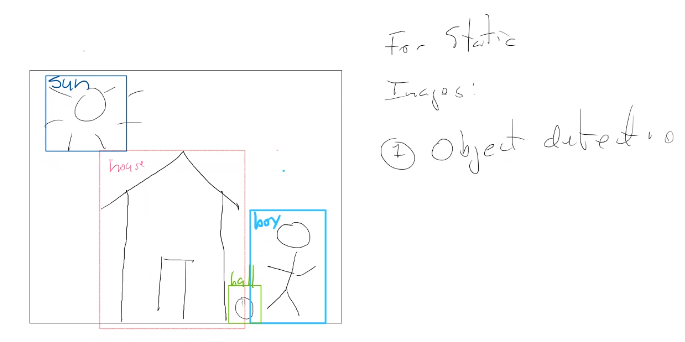